# 數據分析前處理與分析---基礎篇

## 目錄
* 解釋Overfitting
* 線性迴歸

  (1)分為訓練資料與測試資料
  
  (2)準備線性迴歸
  
  
* 房價預測
* 相關係數矩陣

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1 解釋Overfitting

#### (1)

In [54]:
x = np.random.rand(6)
y = np.random.rand(6)

In [55]:
#print(y)

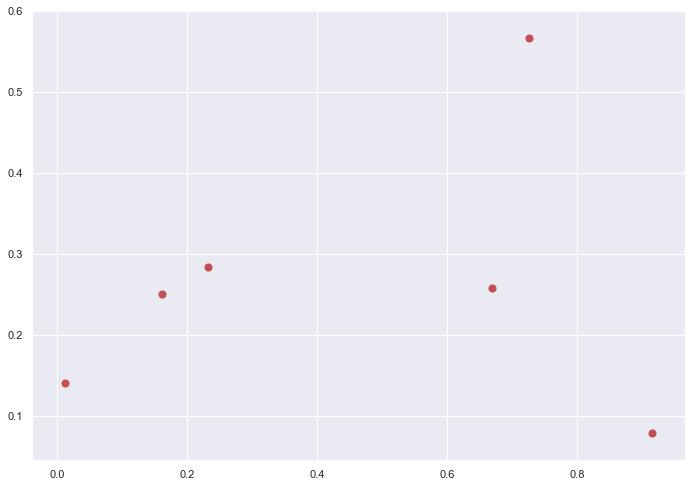

In [56]:
plt.scatter(x, y, c='r', s=50)

#### (2)

* n = 1表示初始值在1

In [57]:
def myplot(n = 1):
    plt.scatter(x, y, c='r', s= 50)
    
    #x軸
    t = np.linspace(-0.2, 1.2, 1000)
    plt.plot(t, 0.5*np.sin(n*t) + 0.5)

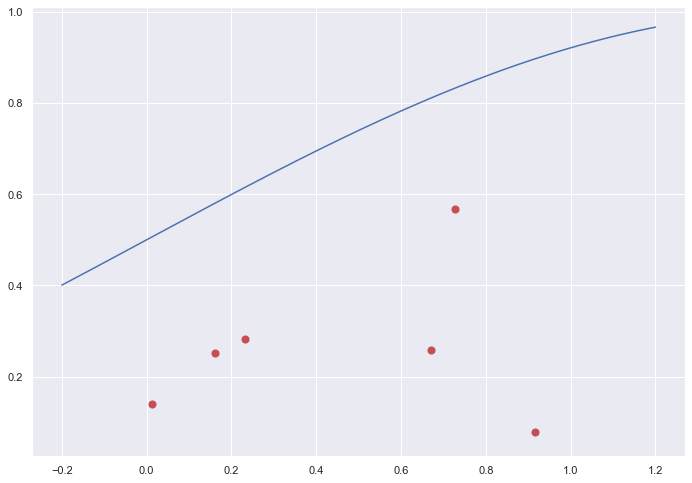

In [58]:
myplot(1)

#### (3)

In [59]:
from ipywidgets import interact

#### 當n越來越大就overfittng

In [60]:
interact(myplot, n=(1, 200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

### 2 線性迴歸


e.g.  
$f(x) = 1.2x + 0.8 + \varepsilon$

In [9]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3 * np.random.randn(200)

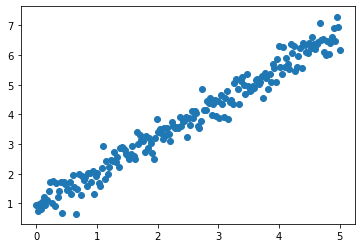

In [10]:
plt.scatter(x, y)

###  2.1 分為訓練資料與測試資料

In [11]:
from sklearn.model_selection import train_test_split

#### 機器學習中(數據分析)，輸入資料是
$$[x_1, x_2, x_3....]$$

#### 喜歡放成

$$[[x_1], [x_2], [x_3], ....]$$

#### 意思是說原本n維向量，要變成n*1

In [62]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3 * np.random.randn(200)

In [12]:
x.shape

(200,)

In [13]:
x = x.reshape(200, 1)

* random_state=0 (隨便給一個數字就可以) : 為了固定每次取出的東西，所以這一次抽出的訓練資料會等於下一次抽出的訓練資料....，避免這次抽的比較爛，下次又比較好.....

* 其實線性規劃不用分訓練、測試資料

#### test_size = 0.2 : 測試資料只佔了全部的20%

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [63]:
#len(x_train)

In [64]:
#len(x_test)

### 2.2 準備線性迴歸
#### ● 所有的函數學習，包括線性迴歸、機器學習、神經網路都是都是三部曲:

#### step 1 開一台函數學習機
    
#### step 2 訓練
    
#### step 3 預測

#### Step 1 建函數學習機器

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

### ??? Linear egression() 會不會overfitting

#### Step 2 訓練

In [20]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Step 3 預測

* [[10]] : 通常會輸入好幾個資料讓他預測所以[[ ]]兩個中括號

In [21]:
model.predict([[10]])

array([12.68565553])

In [22]:
model.predict([[10], [5]])

array([12.68565553,  6.77786949])

In [23]:
y_predict = model.predict(x_test)

#### Step 4 畫圖

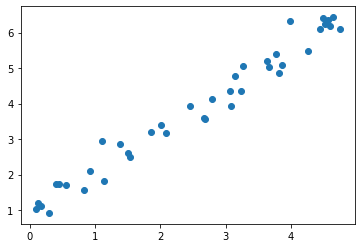

In [24]:
plt.scatter(x_test, y_test)

#### 真實資料跟predict資料做比較
* 其實x_test要先拉平，但其實沒有也沒關係sklearn自己會畫對

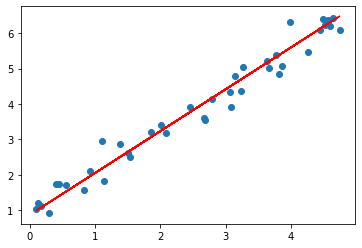

In [25]:
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, c = 'r')

###  3 Boston房價預測
* load_boston : sklearn已經幫我們預處理data了

### step 1 讀入資料

In [26]:
from sklearn.datasets import load_boston

In [27]:
boston_dataset = load_boston()

#### 看資料描述

In [66]:
#print(boston_dataset.DESCR)

In [29]:
len(boston_dataset.feature_names)

13

In [30]:
boston_dataset.data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

### step 2 整理

In [31]:
boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)

In [32]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 房價

In [33]:
#boston_dataset.target

### step 3 把房價加入表格

In [34]:
boston['MEDV']=boston_dataset.target

In [35]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### step 4 畫圖

In [36]:
import seaborn as sns 

* sns : 畫圖套件
* bins=30 : 分為30類

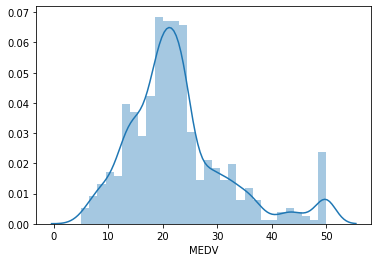

In [37]:
sns.distplot(boston.MEDV, bins=30)

### step 5 準備資料

In [38]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV

In [68]:
#X

### step 6 切割資料

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [41]:
len(x_train)
len(x_test)

102

### step 7 數據分析三部曲

step 1 開函數學習機

In [42]:
model = LinearRegression()

step 2 訓練

In [43]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

step 3 預測

In [44]:
y_predict = model.predict(x_test)

### Q : 如何看出預測好不好?

#### method 1

In [45]:
y_predict - y_test

329     2.289638
371   -26.278589
219     6.364999
403     3.822386
78      0.243823
         ...    
56      0.742171
455     1.471783
60     -0.762805
213    -2.794112
108     2.573233
Name: MEDV, Length: 102, dtype: float64

#### method 2 

In [46]:
#用這個畫更清楚
sns.set()

* 點落在紅線上，表示y_test為y_predict，也就是說預測得很好

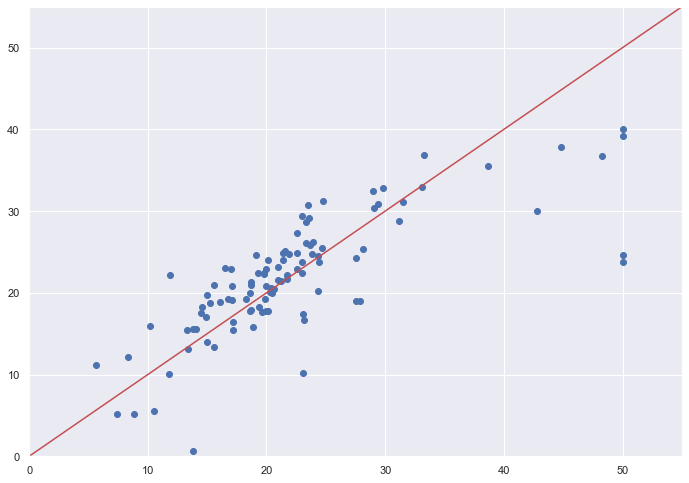

In [69]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)

#畫一條直線表示 'x = y'
plt.plot([0, 55], [0, 55], 'r')

### 4 相關係數矩陣

### Q : 怎麼知道挑哪些數據去學習比較好?
#### (1)正規化
#### (2)挑走outliars
#### (3)畫相關係數矩陣看哪個比較好 : 我們通常都挑高度正相關與高度負相關的
#### (4)  .....

In [48]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [49]:
correlation_matrix = boston.corr().round(2)

#### 取相關係數大的，不論為正相關或負相關
* annot = True : 標向是甚麼 (右邊的尺)
* rc : 改matplotlib中的參數
* 'figure.figsize' : (11.7, 8.27) : 改大小

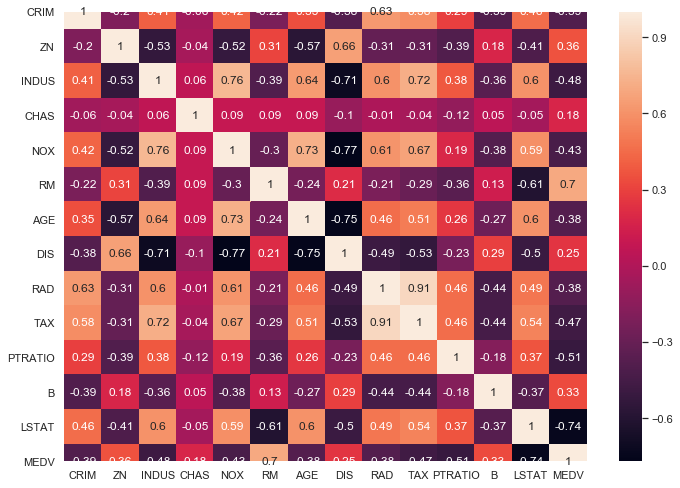

In [50]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(correlation_matrix, annot = True)

### ???? 不要用全部的數據去預測，看準確度(看是否比較好)